<a href="https://colab.research.google.com/github/saywoogie/flask/blob/main/%EB%8B%B4%EB%B0%B0%EA%B0%91%EB%B6%84%EB%A5%98%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import os
import shutil


directory_list = [
    './drive/MyDrive/cigarClass/train/',
    './drive/MyDrive/cigarClass/test/',
]

for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
resnet34 = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './drive/MyDrive/cigarClass/'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=2)

print('train data num :', len(train_datasets))
print('test data num:', len(test_datasets))

class_names = train_datasets.classes
print('class:', class_names)

train data num : 150
test data num: 50
class: ['esseChange1mg', 'esseChange1mgUp', 'esseChange4mg', 'marlboroMedium', 'marlboroRed']


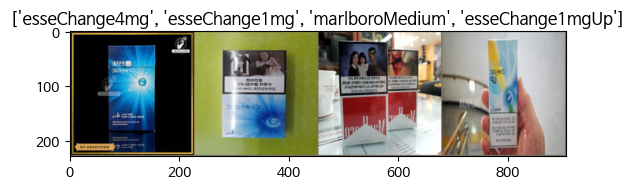

In [ ]:
def imshow(input, title):
    input = input.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    plt.imshow(input)
    plt.title(title)
    plt.show()

iterator = iter(train_dataloader)

inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
model = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 80
model.train()
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))



#0 Loss: 1.6756 Acc: 34.6667% Time: 1.9352s
#1 Loss: 0.5220 Acc: 82.6667% Time: 4.5280s
#2 Loss: 0.2764 Acc: 92.0000% Time: 7.2245s
#3 Loss: 0.2116 Acc: 92.6667% Time: 9.3201s
#4 Loss: 0.2139 Acc: 93.3333% Time: 11.0114s
#5 Loss: 0.4553 Acc: 82.0000% Time: 12.7469s
#6 Loss: 0.1358 Acc: 96.0000% Time: 14.4119s
#7 Loss: 0.1328 Acc: 94.6667% Time: 16.1067s
#8 Loss: 0.1576 Acc: 94.0000% Time: 17.8327s
#9 Loss: 0.1224 Acc: 94.6667% Time: 20.1598s
#10 Loss: 0.3186 Acc: 92.0000% Time: 22.6017s
#11 Loss: 0.2696 Acc: 92.6667% Time: 25.1944s
#12 Loss: 0.1880 Acc: 93.3333% Time: 27.0793s
#13 Loss: 0.1222 Acc: 96.6667% Time: 28.7794s
#14 Loss: 0.1390 Acc: 94.0000% Time: 30.5635s
#15 Loss: 0.1795 Acc: 94.6667% Time: 32.2614s
#16 Loss: 0.1028 Acc: 97.3333% Time: 34.0077s
#17 Loss: 0.0372 Acc: 99.3333% Time: 35.8008s
#18 Loss: 0.1409 Acc: 94.6667% Time: 38.4296s
#19 Loss: 0.0504 Acc: 98.0000% Time: 41.0985s
#20 Loss: 0.0417 Acc: 98.6667% Time: 43.3663s
#21 Loss: 0.0252 Acc: 100.0000% Time: 45.0855s
#

[predict: esseChange1mgUp] (real: esseChange1mgUp)


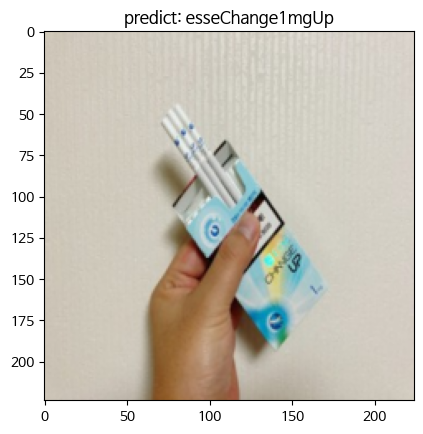

[predict: esseChange4mg] (real: esseChange4mg)


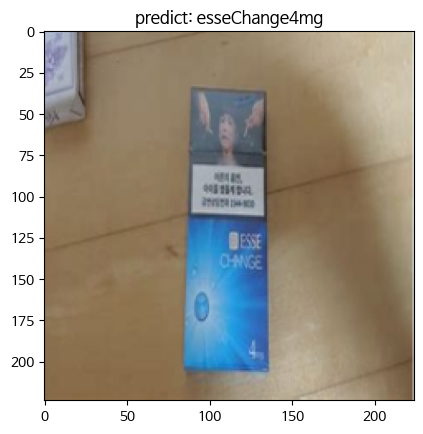

[predict: esseChange1mgUp] (real: esseChange1mgUp)


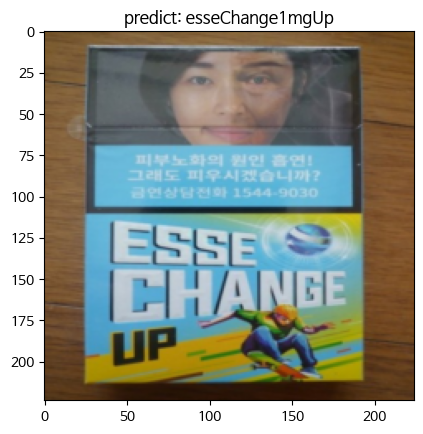

[predict: marlboroMedium] (real: marlboroMedium)


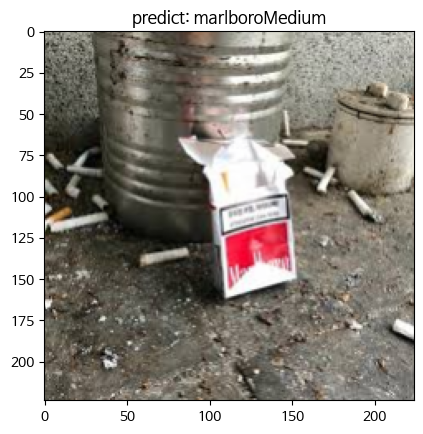

[predict: esseChange1mgUp] (real: esseChange1mgUp)


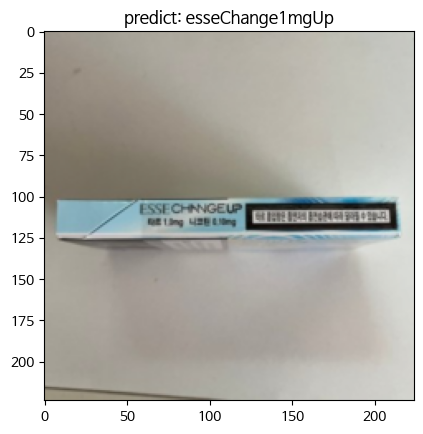

[predict: marlboroRed] (real: marlboroRed)


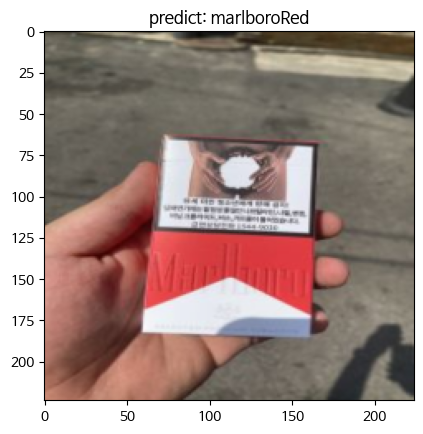

[predict: esseChange1mg] (real: esseChange1mg)


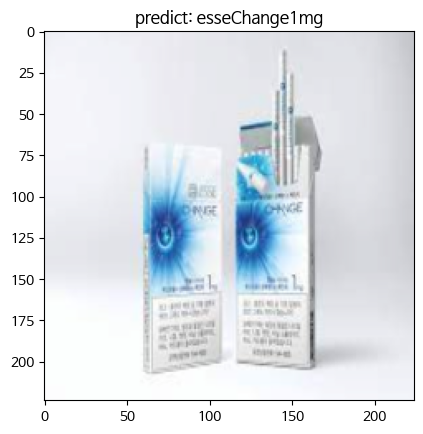

[predict: esseChange4mg] (real: esseChange4mg)


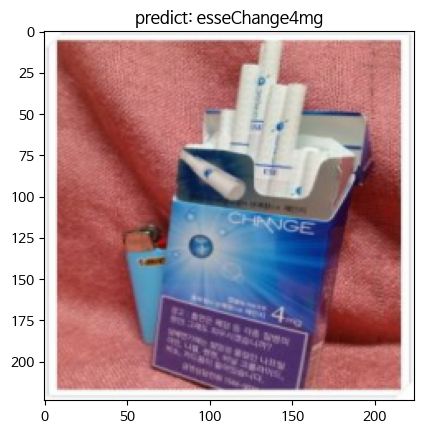

[predict: marlboroRed] (real: marlboroRed)


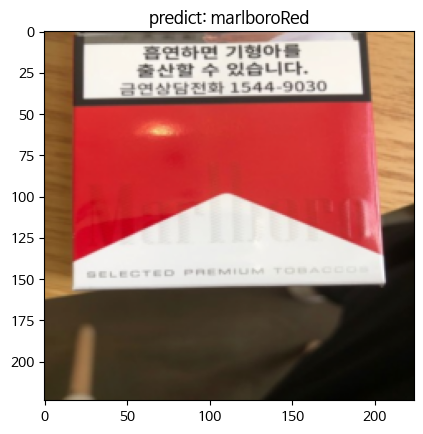

[predict: marlboroMedium] (real: marlboroMedium)


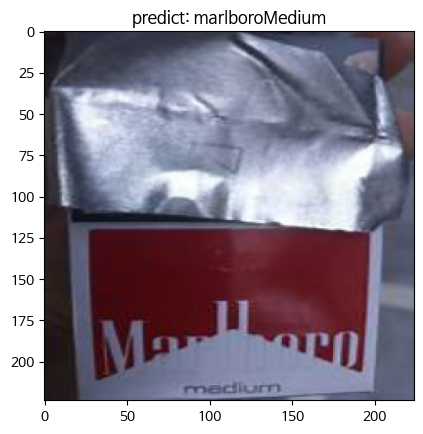

[predict: marlboroMedium] (real: marlboroMedium)


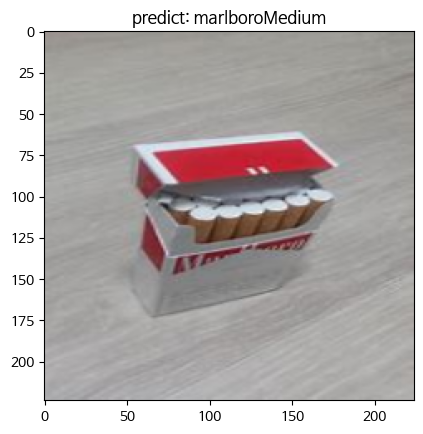

[predict: esseChange1mg] (real: esseChange1mg)


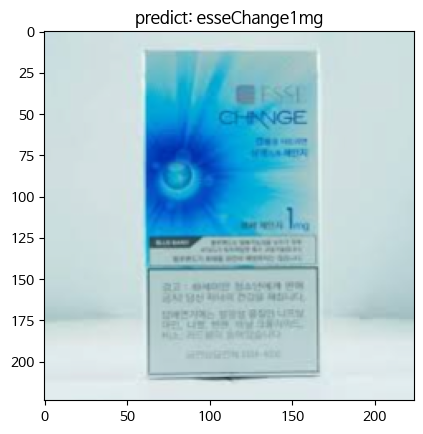

[predict: marlboroMedium] (real: marlboroMedium)


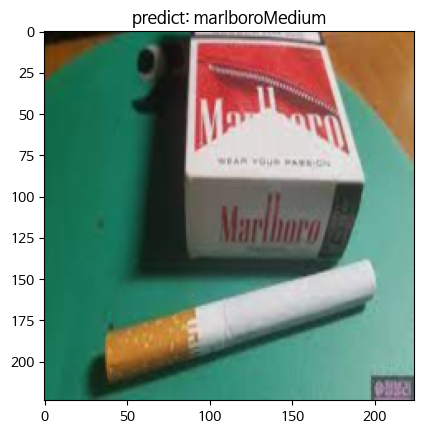

[Test Phase] Loss: 0.1576 Acc: 94.0000% Time: 4.6656s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[predict: {class_names[preds[0]]}] (real: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='predict: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

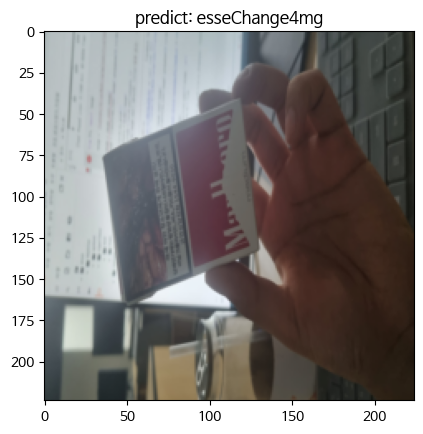

In [ ]:
from PIL import Image

image = '/content/drive/MyDrive/apitest/firstTest.jpg'

image = Image.open(image)
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='predict: ' + class_names[preds[0]])

In [ ]:
!pip install pyngrok
!pip install flask_ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.8/731.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.1-py3-none-any.whl size=21122 sha256=021149588ca2142bce3d6565904f9adf58de5cb827ab756bafd877603514b88d
  Stored in directory: /root/.cache/pip/wheels/3b/32/0e/27789b6fde02bf2b320d6f1a0fd9e1354b257c5f75eefc29bc
Successfully built pyngrok


In [ ]:
import io

from pyngrok import ngrok
!ngrok authtoken 2YRSrelGOUY1pN8kRgsFXfNrGSm_3LefGdPRTNLv4xfgno78W

from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok

def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)
run_with_ngrok(app)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        file = request.files['file']
        image_bytes = file.read()

        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://b27b-34-135-203-209.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [25/Nov/2023 23:46:30] "POST / HTTP/1.1" 400 -
